### Clasificación desempeño del estudiante (datos sin Indicador de Logro)

El modelo predice la calificación final del estudiante a partir de un algoritmo de clasificación, el umbral de desempeño es:

- 0 - Bajo desempeño  (calificación entre 0.0 y 2.9)
- 1 - Medio desempeño (calificación entre 3.0 y 4.0)
- 2 - Alto desempeño  (calificación entre 4.1 y 5.0)

#### Tareas

- Generar el balanceo de los datos.
- Seleccionar las mejores características.
- Dividir los datos en 80% para entrenamiento y 20% para pruebas
- Aplicar hiperparámetros (gridsearch) a los algoritmos: Naive Bayes (NB), SVM, Árbol de decisión (DT) y Bosque Aleatorio (RF).
- Entrenar los modelos con las mejores características.
- Obtener las métricas: matriz de confusión, accuracy, precisión, recall y f1 score.
- Crear una lista con los resultados f1 score obtenidos para los 4 algoritmos.
- Generar una gráfica de barras para identificar cúal fue el algoritmo que obtuvo los mejores resultados.

#### Diccionario de datos

| Variable                  | Tipo             | Descripción |
|---------------------------|------------------|-------------|
| lab_1                     | numérico decimal | Calificación del laboratorio 1 |
| tiempo_entrega_lab_1      | numérico decimal | Tiempo de entrega del laboratorio 1 (horas) |
| intentos_lab_1            | numérico entero  | Total de intentos del laboratorio 1 |
| resultado_lab_1           | numérico entero  | Resultado de INGInious para el laboratorio 1 (0- No presentó; 1- Failed ; 2- Overflow ; 3- Success) |
| lab_2                     | numérico decimal | Calificación del laboratorio 2 |
| lab_3                     | numérico decimal | Calificación del laboratorio 3 |
| grade                     | numérico entero  | Calificación final (0- Bajo desempeño; 1- Medio desempeño; 2- Alto desempeño) |

#### Se importan las librerias

In [1]:
# Se importan las librerias
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

##### INSERTE SU CÓDIGO AQUÍ #####
# Modelos Clasificación: Naive Bayes (NB), SVM, Árboles de Decisión (DT), Bosque Aleatorio (RF) 
# Libreria para Naive Bayes

# Libreria para SVM

# Libreria para árboles de decisión

# Libreria para Bosque Aleatorio


# Libreria para el resample 

# Mejores características - Eli5

# Libreria para dividir los datos de entrenamiento y de pruebas

# Genera la matriz de confusión

# Gerera el reporte de la clasificación

# Librerias para métricas del modelo


# Libreria para calcular la media y la desviación estándar utilizadas en las características

# Libreria de búsqueda en cuadrícula

##### FIN CÓDIGO INSERTADO #####

### Se cargan los datos al dataframe

In [3]:
# Se cargan los registros en un DataFrame 
data = pd.read_csv("data/student_performance.csv", sep=";")

data

,lab_1,tiempo_entrega_lab_1,intentos_lab_1,resultado_lab_1,lab_2,lab_3,grade
0,4.4,0.63,2,3,4.4,4.9,2
1,3.3,0.33,1,3,3.3,3.7,1
2,4.7,0.78,3,3,4.3,4.8,2
3,4.3,0.28,1,3,4.0,4.9,2
4,4.2,0.50,10,3,3.1,4.9,1
...,...,...,...,...,...,...,...
463,2.2,3.89,6,3,3.0,3.5,1
464,4.6,0.35,1,0,0.0,0.0,0
465,4.6,0.48,1,0,5.0,0.0,1
466,4.6,0.00,0,0,0.0,0.0,0


### Preprocesamiento de datos

In [4]:
# Se buscan registros NaN para eliminarlos
print('Columna         Cantidad NaN')
print(data.isnull().sum(axis = 0))
print(data.shape)

# Se eliminan los registros NA
#data = data.dropna()

Columna         Cantidad NaN
lab_1                   0
tiempo_entrega_lab_1    0
intentos_lab_1          0
resultado_lab_1         0
lab_2                   0
lab_3                   0
grade                   0
dtype: int64
(468, 7)


In [5]:
# Se consulta la cantidad de registros para Grade
data.groupby('grade').size()

grade
0    162
1    200
2    106
dtype: int64

In [6]:
##### INSERTE SU CÓDIGO AQUÍ #####
# Se realiza el resample 





##### FIN CÓDIGO INSERTADO #####

0    200
1    200
2    200
Name: grade, dtype: int64

In [7]:
# Se genera las estadísticas del DataFrame
data2.describe()

,lab_1,tiempo_entrega_lab_1,intentos_lab_1,resultado_lab_1,lab_2,lab_3,grade
count,600.000000,600.000000,600.000000,600.000000,600.00000,600.000000,600.000000
mean,2.954000,2.202933,3.060000,2.621667,3.29350,4.044833,1.000000
std,1.854422,4.200492,4.514092,0.888733,1.83559,1.590888,0.817178
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,0.300000,1.000000,3.000000,1.60000,4.000000,0.000000
50%,3.550000,0.480000,1.000000,3.000000,4.00000,4.900000,1.000000
75%,4.700000,1.000000,3.000000,3.000000,4.90000,5.000000,2.000000
max,5.000000,22.080000,39.000000,3.000000,5.00000,5.000000,2.000000


In [8]:
# Se observa el tipo de datos de las columnas
data2.dtypes

lab_1                   float64
tiempo_entrega_lab_1    float64
intentos_lab_1            int64
resultado_lab_1           int64
lab_2                   float64
lab_3                   float64
grade                     int64
dtype: object

### ----------------------------------------

### Predicción con todas las características 

#### Se crea el set de entrenamiento y de pruebas

In [9]:
# Se definen los valores de las características	
features = ['lab_1','tiempo_entrega_lab_1','intentos_lab_1','resultado_lab_1',
            'lab_2','lab_3']
			
# calificación
X = data2[features]
# se define la variable objetivo
y = data2['grade'].values

##### INSERTE SU CÓDIGO AQUÍ #####
# Se dividen los datos para el entrenamiento (80% entrenamiento y 20% pruebas)


##### FIN CÓDIGO INSERTADO #####

#### Mejores características Eli5

In [11]:
# Se crea el modelo
dtc = DecisionTreeClassifier() 
  
# Se entrena el modelo
dtc.fit(X_train, y_train)

pred = dtc.predict(X_test)

##### INSERTE SU CÓDIGO AQUÍ #####


##### FIN CÓDIGO INSERTADO #####

Weight,Feature
0.4324,lab_1
0.3877,lab_2
0.1047,resultado_lab_1
0.0371,tiempo_entrega_lab_1
0.0213,lab_3
0.0169,intentos_lab_1


### --------------------------------------------------------------------------

### Predicción con ajuste de Hiperparámetros (Grid Search)

In [12]:
# Se definen los valores de las características
features = ['lab_1','lab_2','resultado_lab_1']
# calificación
X = data2[features]
# se define la variable objetivo
y = data2['grade'].values

##### INSERTE SU CÓDIGO AQUÍ #####
# Se dividen los datos para el entrenamiento (80% entrenamiento y 20% pruebas)


##### FIN CÓDIGO INSERTADO #####

#### Naive Bayes

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

nb = GaussianNB()

# Parámetros

grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

grid_search = GridSearchCV(estimator = nb, 
                           param_grid = grid, 
                           cv= 10, 
                           verbose=1,
                           n_jobs=-1,  
                           scoring = "accuracy")

searchResults = grid_search.fit(X_train, y_train.ravel())

# extract the best model and evaluate it
bestModel = searchResults.best_estimator_

print("Best Parameters (GridSearch):", bestModel)
print("-----------------------------------------------------------")

# Se crea un objeto con los mejores ajustes de Hiperparámetros
nb = bestModel

# Se entrena el modelo
nb.fit(X_train, y_train)

pred = nb.predict(X_test)

# Se imprime la matriz de confusión
print(confusion_matrix(y_test, pred))
# Se imprime la precisión del modelo
print(classification_report(y_test, pred))

# Otras métricas clasificación: Precisión, Recall, F1-Score
print("Precisión: ", round(precision_score(y_test, pred, average='weighted'), 2))
print("Recall: ", round(recall_score(y_test, pred, average='weighted'),2))
print("F1-Score: ", round(f1_score(y_test, pred, average='weighted'),2))



Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best Parameters (GridSearch): GaussianNB(var_smoothing=0.0533669923120631)
-----------------------------------------------------------
[[26 15  0]
 [ 4 25  3]
 [ 0  0 47]]
              precision    recall  f1-score   support

           0       0.87      0.63      0.73        41
           1       0.62      0.78      0.69        32
           2       0.94      1.00      0.97        47

    accuracy                           0.82       120
   macro avg       0.81      0.81      0.80       120
weighted avg       0.83      0.82      0.81       120

Precisión:  0.83
Recall:  0.82
F1-Score:  0.81


#### SVM

In [14]:
##### INSERTE SU CÓDIGO AQUÍ #####


##### FIN CÓDIGO INSERTADO #####

Fitting 10 folds for each of 32 candidates, totalling 320 fits
Best Parameters (GridSearch): SVC(C=10, gamma=10)
-----------------------------------------------------------
[[40  1  0]
 [ 4 28  0]
 [ 0  0 47]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        41
           1       0.97      0.88      0.92        32
           2       1.00      1.00      1.00        47

    accuracy                           0.96       120
   macro avg       0.96      0.95      0.95       120
weighted avg       0.96      0.96      0.96       120

Precisión:  0.96
Recall:  0.96
F1-Score:  0.96


#### Árbol de Decisión (DT)

In [15]:
##### INSERTE SU CÓDIGO AQUÍ #####


##### FIN CÓDIGO INSERTADO #####

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best Parameters (GridSearch): DecisionTreeClassifier(max_depth=20, min_samples_leaf=5)
-----------------------------------------------------------
[[35  6  0]
 [ 4 27  1]
 [ 0  0 47]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        41
           1       0.82      0.84      0.83        32
           2       0.98      1.00      0.99        47

    accuracy                           0.91       120
   macro avg       0.90      0.90      0.90       120
weighted avg       0.91      0.91      0.91       120

Precisión:  0.91
Recall:  0.91
F1-Score:  0.91


#### Bosque Aleatorio (RF)

In [16]:
##### INSERTE SU CÓDIGO AQUÍ #####


##### FIN CÓDIGO INSERTADO #####

Fitting 2 folds for each of 1080 candidates, totalling 2160 fits
Best Parameters (GridSearch): RandomForestClassifier(bootstrap=False, max_depth=20, max_features='log2',
                       min_samples_split=10, n_estimators=5)
-----------------------------------------------------------
[[38  3  0]
 [ 2 30  0]
 [ 0  2 45]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        41
           1       0.86      0.94      0.90        32
           2       1.00      0.96      0.98        47

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120

Precisión:  0.94
Recall:  0.94
F1-Score:  0.94


### Gráfica de barras para la predicción

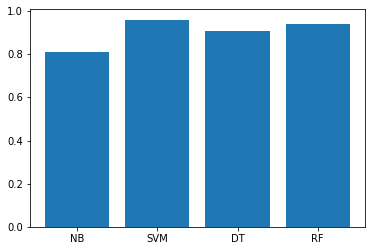

In [17]:
##### INSERTE SU CÓDIGO AQUÍ #####
# F1-score


##### FIN CÓDIGO INSERTADO #####